<a href="https://colab.research.google.com/github/anujsaxena/AIML/blob/main/AIML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Various ML Algorithms on real dataset**

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def split_dataset(dataset, train_percentage, feature_headers, target_header):
  # Split dataset into train and test dataset
    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers], dataset[target_header],train_size=train_percentage)
    return train_x, test_x, train_y, test_y

def handel_missing_values(dataset, missing_values_header, missing_label):
  return dataset[dataset[missing_values_header] != missing_label]

HEADERS = ["S_LI_1","LS_LI_2","PA_Phoneme","SWE_SS","VSR_LR","CN_PV","CL_Add","CL_Sub","RG_Series","VSR_LR","PA_Rhyme","CL_BMS","VMI_MS","VSR_RAN","PA_DE","CL_WP","CG_Spellings","HW_Legibility","PM_RFaudio","CG_STMLTM","Loudness","Class"]
INPUT_PATH = "data2000.csv"
dataset = pandas.read_csv(INPUT_PATH)
x=dataset
df = pandas.read_csv(INPUT_PATH, na_values='NaN', keep_default_na=False)
print("Any empty cells")
print(np.count_nonzero(df.isnull().values))



Any empty cells
0


In [ ]:
train_x, test_x, train_y, test_y = split_dataset(dataset, 0.7, HEADERS[1:-1], HEADERS[-1])
print(HEADERS[-1])
print(HEADERS[1:-1])

Class
['LS_LI_2', 'PA_Phoneme', 'SWE_SS', 'VSR_LR', 'CN_PV', 'CL_Add', 'CL_Sub', 'RG_Series', 'VSR_LR', 'PA_Rhyme', 'CL_BMS', 'VMI_MS', 'VSR_RAN', 'PA_DE', 'CL_WP', 'CG_Spellings', 'HW_Legibility', 'PM_RFaudio', 'CG_STMLTM', 'Loudness']


In [ ]:
null_columns=x.columns[x.isnull().any()]
#print(dataset.apply(lambda x: x.count(), axis=1))
print(x[x.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [ ]:
# shape
print(dataset.shape)
# display data
print(dataset)
# head
print(dataset.head(21))

(2001, 22)
      LS_LI_1  LS_LI_2  PA_Phoneme  ...  CG_STMLTM  Loudness       Class
0           1        1           0  ...          1        66    Dyslexia
1           1        0           0  ...          1        66    Dyslexia
2           0        0           0  ...          1        70    Dyslexia
3           0        1           0  ...          1        67    Dyslexia
4           1        1           0  ...          1        73  Dysgraphia
...       ...      ...         ...  ...        ...       ...         ...
1996        0        0           0  ...          1        70          DD
1997        1        1           1  ...          1        80  Dysgraphia
1998        1        1           0  ...          0        71         DD6
1999        1        1           1  ...          0        67  Dysgraphia
2000        1        1           1  ...          1        85          ND

[2001 rows x 22 columns]
    LS_LI_1  LS_LI_2  PA_Phoneme  ...  CG_STMLTM  Loudness       Class
0         1     

In [ ]:
print(dataset.describe())

           LS_LI_1      LS_LI_2  ...    CG_STMLTM     Loudness
count  2001.000000  2001.000000  ...  2001.000000  2001.000000
mean      0.757621     0.664668  ...     0.812594    69.068966
std       0.428629     0.472225  ...     0.390335     5.598771
min       0.000000     0.000000  ...     0.000000    55.000000
25%       1.000000     0.000000  ...     1.000000    66.000000
50%       1.000000     1.000000  ...     1.000000    70.000000
75%       1.000000     1.000000  ...     1.000000    71.000000
max       1.000000     1.000000  ...     1.000000    87.000000

[8 rows x 21 columns]


In [ ]:
# class distribution
print(dataset.groupby('Class').size())

Class
DD             209
DD2             92
DD3            144
DD4            164
DD5             18
DD6             59
DD7             24
DD8              2
Dycalculia       6
Dyscalculia     40
Dysgraphia     515
Dyslexia       343
ND             358
Stammer         12
stammer         15
dtype: int64


In [ ]:
array = dataset.values
X = array[:,0:19]
y = array[:,21]
print(X)
print()
print(y)

[[1 1 0 ... 0.5 0.5 0.9]
 [1 0 0 ... 1.0 1.0 0.6]
 [0 0 0 ... 1.0 1.0 0.9]
 ...
 [1 1 0 ... 0.5 0.5 0.2]
 [1 1 1 ... 1.0 0.5 0.8]
 [1 1 1 ... 1.0 1.0 1.0]]

['Dyslexia' 'Dyslexia' 'Dyslexia' ... 'DD6' 'Dysgraphia' 'ND']


# **KNN**

In [ ]:
#Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)   #compile the model
predictions = knn.predict(test_x)
print("KNN Accuracy score = ",(accuracy_score(test_y, predictions)*100))
print("\nConfusion Matrix \n")
print(confusion_matrix(test_y, predictions))
print("\nClassification Report - KNN\n")
print(classification_report(test_y, predictions))

KNN Accuracy score =  94.84193011647255

Confusion Matrix 

[[ 65   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  43   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  48   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   2   0   5   1   0  11   0   0]
 [  0   0   0   0   0   0   0   0   0 140   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 106   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   5   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0]]

Classification Report - KNN

              precision    recall  f1-score   support

          DD       1.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(14, 14)


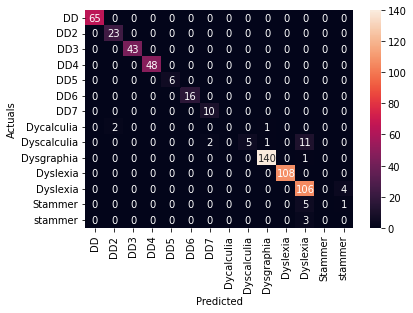

In [ ]:
import seaborn as sns
cm = confusion_matrix(test_y, predictions)
print(cm.shape)
LABELS = ['DD', 'DD2', 'DD3', 'DD4', 'DD5','DD6','DD7','Dycalculia','Dyscalculia','Dysgraphia','Dyslexia','Dyslexia','Stammer','stammer']
sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
xl = plt.xlabel("Predicted")
yl = plt.ylabel("Actuals")

# **Prediction**

In [ ]:
for i in range(0, len(predictions)):
        print("Feature :: {}  Class in :: {}".format(list(X)[i], predictions[i]))

Feature :: [1 1 0 1 1 1 1 1 1 1 0.8 0.8 0.9 0.6 0.8 1.0 0.5 0.5 0.9]  Class in :: Dysgraphia
Feature :: [1 0 0 1 0 1 1 0 1 1 0.5 0.8 1.0 0.6 0.8 1.0 1.0 1.0 0.6]  Class in :: DD
Feature :: [0 0 0 1 1 1 1 1 1 1 1.0 1.0 0.9 0.4 1.0 1.0 1.0 1.0 0.9]  Class in :: Dysgraphia
Feature :: [0 1 0 1 1 1 0 0 1 1 0.5 0.7 0.9 0.6 0.8 1.0 1.0 0.5 0.6]  Class in :: Dyslexia
Feature :: [1 1 0 0 0 1 1 1 0 1 0.5 0.8 0.8 1.0 0.8 1.0 0.5 0.5 0.8]  Class in :: DD6
Feature :: [1 1 0 0 0 0 1 1 0 0 0.0 0.2 0.8 0.0 0.0 0.0 0.0 0.0 0.4]  Class in :: Dyslexia
Feature :: [1 1 0 0 0 1 1 1 0 0 0.6 0.8 0.8 0.5 0.5 1.0 0.0 0.0 0.6]  Class in :: stammer
Feature :: [1 0 0 1 0 1 1 1 1 0 0.4 0.8 0.8 0.4 0.5 0.5 0.0 0.0 0.5]  Class in :: ND
Feature :: [1 1 1 0 0 1 0 1 1 0 0.6 0.8 0.9 0.5 0.8 1.0 0.0 0.5 0.8]  Class in :: DD2
Feature :: [1 1 1 1 0 1 1 1 0 1 0.5 0.8 0.8 0.8 1.0 1.0 0.5 0.5 0.8]  Class in :: Dysgraphia
Feature :: [1 1 1 0 1 1 1 1 1 0 0.5 0.8 0.8 1.0 1.0 1.0 0.5 0.5 0.8]  Class in :: DD
Feature :: [1 0 0 1 1 

# **Logistic Regression**

In [ ]:
Lr=LogisticRegression()
X_train=train_x
Y_train=train_y
X_validation=test_x
Y_validation=test_y
Lr.fit(X_train, Y_train)  #compile the model
predictions = Lr.predict(X_validation)
print("Logistic Regression Accuracy score = ",(accuracy_score(Y_validation, predictions)*100))

print("\nConfusion Matrix \n")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report - LR\n")
print(classification_report(Y_validation, predictions))

for i in range(0, len(predictions)):
        print("Feature :: {}  Class in :: {}".format(list(Y_validation)[i], predictions[i]))


Logistic Regression Accuracy score =  83.36106489184692

Confusion Matrix 

[[ 57   0   4   0   0   0   0   0   0   4   0   0   0   0]
 [  0  13   0   0   0   0   0   0   0   0   8   2   0   0]
 [  7   0  36   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  34   0   0   0   0   0   9   5   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   1   2   0   0  13   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0   0   7   0   0   0   0]
 [  0   0   0   0   1   0   0   0   2   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0  11   1   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0 123   0  18   0   0]
 [  3   0   0   4   0   0   0   0   0   6  95   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 110   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0]]

Classification Report - LR

              precision    recall  f1-score   support

          DD 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

# **Linear Discriminant Analysis**


In [ ]:
Lda = LinearDiscriminantAnalysis()
Lda.fit(X_train, Y_train)  #compile 
predictions = Lda.predict(X_validation)
print("Linear Discriminant Analysis(LDA) Accuracy score = ",(accuracy_score(Y_validation, predictions)*100))

print("\nConfusion Matrix \n")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report - LDA\n")
print(classification_report(Y_validation, predictions))

Linear Discriminant Analysis(LDA) Accuracy score =  82.19633943427621

Confusion Matrix 

[[ 57   0   4   0   0   0   0   0   0   4   0   0   0   0]
 [  0  13   0   0   0   0   0   0   0   1   8   1   0   0]
 [  7   0  36   0   0   0   0   0   0   0   0   0   0   0]
 [  9   0   0  30   0   0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0  13   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  17   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0 116   0  18   0   7]
 [  3   0   0   4   0   0   0   0   0   1 100   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0  92   0  17]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   1]]

Classification Report - LDA

              precision    recall  f1-score   support

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Decision Tree Classifier**

In [ ]:
CT = DecisionTreeClassifier()
CT.fit(X_train, Y_train) #compile
predictions = CT.predict(X_validation)
print("Decision Tree Classifier(CART) Accuracy score = ",(accuracy_score(Y_validation, predictions)*100))

print("\nConfusion Matrix \n")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report - CART\n")
print(classification_report(Y_validation, predictions))

Decision Tree Classifier(CART) Accuracy score =  97.00499168053244

Confusion Matrix 

[[ 65   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  43   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  48   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   6   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15   0   0   4   0   0]
 [  0   0   0   0   0   0   0   0   0 140   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 106   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   5   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0]]

Classification Report - CART

              precision    recall  f1-score   support



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(0, len(predictions)):
        print("Feature :: {}  Class in :: {}".format(list(Y_validation)[i], predictions[i]))

Feature :: Dysgraphia  Class in :: Dysgraphia
Feature :: DD  Class in :: DD
Feature :: Dysgraphia  Class in :: Dysgraphia
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: DD6  Class in :: DD6
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: ND  Class in :: stammer
Feature :: ND  Class in :: ND
Feature :: DD2  Class in :: DD2
Feature :: Dysgraphia  Class in :: Dysgraphia
Feature :: DD  Class in :: DD
Feature :: DD7  Class in :: DD7
Feature :: ND  Class in :: ND
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: DD5  Class in :: DD5
Feature :: ND  Class in :: ND
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: Dyscalculia  Class in :: Dyscalculia
Feature :: DD  Class in :: DD
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: Dyscalculia  Class in :: Dyscalculia
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: Dyslexia  Class in :: Dyslexia
Feature :: ND  Class in :: ND
Feature :: Dysgraphia  Class in :: Dysgraphia
Feature :: DD  Class in :: DD
Feature :: DD  Class in

# **Gaussiann NB**

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)  #compile
predictions = nb.predict(X_validation)
print("Naive Bayes Accuracy score = ",(accuracy_score(Y_validation, predictions)*100))

print("\nConfusion Matrix \n")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report - Naive\n")
print(classification_report(Y_validation, predictions))


Naive Bayes Accuracy score =  62.229617304492514

Confusion Matrix 

[[57  0  4  4  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  2  0  8  0  0  0]
 [ 7  0 29  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  2  0]
 [ 0  0  0 12  0  0  0  0  0 97 14  0 18  0]
 [ 0  0  0 26  0  0  0  0  0  0 75  0  7  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0 98 11]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1]]

Classification Report - Naive

              precision    recall  f1-score   support

          DD       0.86      0.88      0.87        65
         DD2       1.00      0.57      0.72        23
         DD3       0.88      0.67      0.76        43
         DD4       0.53      1.00      0.70        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SVM**

In [ ]:
sv = SVC()
sv.fit(X_train, Y_train)  #compile
predictions = sv.predict(X_validation)
print("SVM Accuracy score = ",(accuracy_score(Y_validation, predictions)*100))

print("\nConfusion Matrix \n")
print(confusion_matrix(Y_validation, predictions))
print("\nClassification Report - SVM\n")
print(classification_report(Y_validation, predictions))

SVM Accuracy score =  33.11148086522462

Confusion Matrix 

[[  0   0   0   0   0   0   0   0   0  37  28   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20  23   0   0   0]
 [  0   0   0   0   0   0   0   0   0  28  20   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  13   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0 132   6   3   0   0]
 [  0   0   0   0   0   0   0   0   0  64  44   0   0   0]
 [  0   0   0   0   0   0   0   0   0  81   6  23   0   0]
 [  0   0   0   0   0   0   0   0   0   5   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0]]

Classification Report - SVM

              precision    recall  f1-score   support

          DD       0.00     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
